In [1]:
import html
import json
import string
import re
from nltk import word_tokenize
from nltk.corpus import stopwords
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import matplotlib.pyplot as plt


pd.set_option("display.max_colwidth", 1000)

In [2]:
fjson = 'raw_tweet_data_telecommunication_100000.json'

# 1. Read data & Preparation

In [3]:
with open(fjson) as file:
    data = json.load(file)
len(data)

45217

In [4]:
df_tweets = pd.DataFrame([t['full_text'] for t in data], columns=['text'])

In [5]:
df_tweets['retweets'] = [t['retweet_count'] for t in data]
df_tweets['favorites'] = [t['favorite_count'] for t in data]
df_tweets['user'] = [t['user']['screen_name'] for t in data]

In [6]:
stop_words = set(stopwords.words('english'))

def text_cleanup(s):
    s_unesc = html.unescape(re.sub(r"http\S+", "", re.sub('\n+', ' ', s)))
    s_noemoji = s_unesc.encode('ascii', 'ignore').decode('ascii')
    wt = word_tokenize(s_noemoji.lower())
    
    wt_filt = [w for w in wt if (w not in stop_words) and (w not in string.punctuation) and (w.isalnum())]
    
    return ' '.join(wt_filt)

In [7]:
df_tweets['text_clean'] = df_tweets['text'].apply(text_cleanup)

In [8]:
def sentim_polarity(s):
    return TextBlob(s).sentiment.polarity

def sentim_subject(s):
    return TextBlob(s).sentiment.subjectivity

df_tweets['polarity'] = df_tweets['text_clean'].apply(sentim_polarity)
df_tweets['subjectivity'] = df_tweets['text_clean'].apply(sentim_subject)
df_tweets.head(20)

,text,retweets,favorites,user,text_clean,polarity,subjectivity
0,IS VERIZON DYING? AT&amp;T? The media makes it seem that way | the wireless wars are far from over\n\n#tech #5G #news \n\nhttps://t.co/69LF79n1Gq via @YouTube @GrnEyeTechGirl @Techlife32,0,0,thetechxtremist,verizon dying media makes seem way wireless wars far tech 5g news via youtube grneyetechgirl techlife32,0.100000,1.000000
1,2 appointments in 4 days not kept by @ATT. Starlink can't get here fast enough. AT&amp;t cares 0% about their customers,0,0,kanakdm,2 appointments 4 days kept att starlink ca get fast enough cares 0 customers,0.100000,0.550000
2,@Vodafone why my internet is as slow as snail your guys are giving unlimited 12 to 6 which is absolutely worst.ost or the time there is no network.,0,0,santo0296,vodafone internet slow snail guys giving unlimited 12 6 absolutely time network,-0.050000,0.650000
3,also the only reason im not sure who said it is because im sitting too far away from the t-mobile stage where they played to see them but i could hear their whole set https://t.co/RfFogvr4O0,0,0,justactnormaII,also reason im sure said im sitting far away stage played see could hear whole set,0.266667,0.762963
4,"@0xabU @dmazieres @Google nah it works now, you need to sideload the verizon OTA, factory reset, and then connect to the internet and try.",0,0,flawedworlddev,0xabu dmazieres google nah works need sideload verizon ota factory reset connect internet try,0.000000,0.000000
5,I just watched my phone line switch from AT&amp;T to Verizon? Lol wtf,0,0,DaniRosaa_,watched phone line switch verizon lol wtf,0.150000,0.850000
6,Aside this heart break from Vodafone Ghana on this sim blocking tomorrow y’all I have found love with @SpeakerShinjini I tell u 😂❤️😭,2,9,OfNkansah,aside heart break vodafone ghana sim blocking tomorrow yall found love speakershinjini tell u,0.500000,0.600000
7,@Verizon This is just BS,0,0,atl__fan,verizon bs,0.000000,0.000000
8,ICYMI on @1053TheFan — My 1-on-1 interview with UFC president Dana White on many things:\n\n— UFC at AT&amp;T Stadium?\n\n— Vince McMahon's retirement\n\n— Who he would face in the octagon … Joe Rogan or Daniel Cormier?\n\n#UFC277 (@1053SS @RJChoppy) https://t.co/QWxfjwzGmW,0,2,TommySledge,icymi 1053thefan interview ufc president danawhite many things ufc tstadium vince mcmahon retirement would face octagon joe rogan daniel cormier ufc277 1053ss rjchoppy,0.500000,0.500000
9,"@SportsByBLinder @VerizonSupport @verizonfios @Verizon Wow, you should call in and push this to a manager, these so call support people do nothing to help or honor things.",0,0,bornimaine,sportsbyblinder verizonsupport verizonfios verizon wow call push manager call support people nothing help honor things,0.100000,1.000000


# 2. Identify several competitive companies

In [9]:
brands = ['verizon', 'att', 'tmobile']

In [10]:
df_brands = pd.DataFrame(brands, columns=['brand'])
df_brands

,brand
0,verizon
1,att
2,tmobile


# 3. Tweet Analysis

In [11]:
for brand in brands:
    num_tweet = len(df_tweets[df_tweets['text_clean'].str.contains(brand)])
    print(f"{brand} : {num_tweet} tweets")

verizon : 18535 tweets
att : 2747 tweets
tmobile : 1512 tweets


In [12]:
df_ntweet = pd.DataFrame()

for brand in brands:
    num_tweet = len(df_tweets[df_tweets['text_clean'].str.contains(brand)])    
    con_df_ntweet = pd.DataFrame(data={'num_tweet':num_tweet}, index=[brand])
    df_ntweet = pd.concat([df_ntweet, con_df_ntweet])

print(df_ntweet)

         num_tweet
verizon      18535
att           2747
tmobile       1512


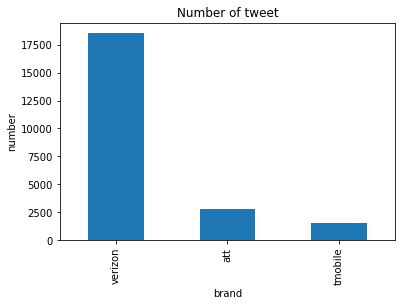

In [13]:
df_ntweet.plot(kind="bar")
plt.title('Number of tweet')
plt.ylabel('number')
plt.xlabel('brand')
plt.legend().set_visible(False)
plt.show()

In [14]:
def brand_sentiment(b):
    return df_tweets[df_tweets['text_clean'].str.contains(b)]['polarity'].mean()

# 4. Sentiment analysis on each brand

In [15]:
df_brands['average_sentiment'] = df_brands['brand'].apply(brand_sentiment)
df_brands['average_sentiment']

0    0.060520
1    0.058552
2    0.065256
Name: average_sentiment, dtype: float64

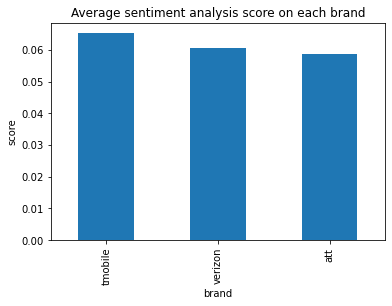

In [16]:
df_brands_i = df_brands.set_index('brand').sort_values(by="average_sentiment", ascending = False)
df_brands_i.plot(kind="bar")
plt.title('Average sentiment analysis score on each brand')
plt.ylabel('score')
plt.xlabel('brand')
plt.legend().set_visible(False)
plt.show()

# 5. Examples of tweet content with the highest sentiment values

In [17]:
df_tweets.sort_values(by='polarity', ascending=False).head(10)

,text,retweets,favorites,user,text_clean,polarity,subjectivity
1751,"Remembering festival sets, and the time The Killers broke the curfew to play arguably the greatest encore in history in 2007 at T.",0,0,DomDom1984,remembering festival sets time killers broke curfew play arguably greatest encore history 2007,1.0,1.0
39984,Member them T-Mobile sidekicks …that was the best phone,0,1,prettigurlbre,member sidekicks best phone,1.0,0.3
3623,"T-Mobile is awesome JD, they are GOATED in customer service. https://t.co/Cju3OEqm3A",0,1,Dlock54,awesome jd goated customer service,1.0,1.0
7368,"Stock: $T - AT&amp;T Inc\n*** NEWS ***\nAT&amp;T Stock: Recession Knocking, Priced For Depression (NYSE:T) - Seeking Alpha\nhttps://t.co/qYtCXO81IJ\nTry now the Best Pivot Point Calculator!! https://t.co/jpELCgCLeJ\n#tradingview\n#stocks\n#stockstowatch https://t.co/uSBec637Nl",0,0,bs_marker,stock inc news stock recession knocking priced depression nyse seeking alpha try best pivot point calculator tradingview stocks stockstowatch,1.0,0.3
485,"Career tip for landing jobs like ""Verizon Sales Consultant"" in #McComb, MS. Go on informational interviews. The best way to get a meeting with a hiring manager is to ask for an informational meeting. #Sales",0,0,tmj_ms_sales,career tip landing jobs like verizon sales consultant mccomb go informational interviews best way get meeting hiring manager ask informational meeting sales,1.0,0.3
3207,Your service costs to much for it not to be the best @verizon,0,1,Queen_Makonnen,service costs much best verizon,1.0,0.3
43434,Vodafone is the best network in Ghana. MTN deducts service charges when you transfer money to other MTN numbers and you’re saying Vodafone is trash!!? #Vodafone @VodafoneGhana,0,5,kontainermonhey,vodafone best network ghana mtn deducts service charges transfer money mtn numbers youre saying vodafone trash vodafone vodafoneghana,1.0,0.3
11819,"The best timeline for everyone: @Instagram abandons its core product and @tumblr becomes a destination for photo sharing again. \n\nUnlike VSCO, tumblr doesn't have a brand problem. People only abandoned it because Yahoo/Verizon broke the product.",0,0,theinstantwin,best timeline everyone instagram abandons core product tumblr becomes destination photo sharing unlike vsco tumblr brand problem people abandoned broke product,1.0,0.3
23222,When your @Kia #ev6 matches your @TMobile #magenta colors. Now we just need T-Mobile 5G in the car and it’ll be perfect. https://t.co/H2tl6vzoDa,0,0,Carlos2858,kia ev6 matches tmobile magenta colors need 5g car itll perfect,1.0,1.0
23225,"Career tip for landing jobs like ""Verizon Sales Consultant"" in Denver, CO. Go on informational interviews. The best way to get a meeting with a hiring manager is to ask for an informational meeting. #Sales #MileHighCity",0,0,tmj_den_sales,career tip landing jobs like verizon sales consultant denver go informational interviews best way get meeting hiring manager ask informational meeting sales milehighcity,1.0,0.3


In [18]:
from IPython.display import display
for b in brands:
    print(f'brand:{b}')
    display(df_tweets[df_tweets['text_clean'].str.contains(b)][:1])

brand:verizon


,text,retweets,favorites,user,text_clean,polarity,subjectivity
0,IS VERIZON DYING? AT&amp;T? The media makes it seem that way | the wireless wars are far from over\n\n#tech #5G #news \n\nhttps://t.co/69LF79n1Gq via @YouTube @GrnEyeTechGirl @Techlife32,0,0,thetechxtremist,verizon dying media makes seem way wireless wars far tech 5g news via youtube grneyetechgirl techlife32,0.1,1.0


brand:att


,text,retweets,favorites,user,text_clean,polarity,subjectivity
1,2 appointments in 4 days not kept by @ATT. Starlink can't get here fast enough. AT&amp;t cares 0% about their customers,0,0,kanakdm,2 appointments 4 days kept att starlink ca get fast enough cares 0 customers,0.1,0.55


brand:tmobile


,text,retweets,favorites,user,text_clean,polarity,subjectivity
22,"Hey, @MetroByTMobile trying to do ANYTHING on your website is impossible; fix your website.\n\nMetroPcs users are like second-class citizens for not switching to a pricey T-Mobile plan or leasing a phone.\n\n#tmobile #metro #CorporateGreed",0,0,bobbysabi,hey metrobytmobile trying anything website impossible fix website metropcs users like citizens switching pricey plan leasing phone tmobile metro corporategreed,-0.666667,1.0


# 6. Examples of the most retweeted content

In [19]:
df_tweets.sort_values(by='retweets', ascending=False).head(5)

,text,retweets,favorites,user,text_clean,polarity,subjectivity
40902,"BYE, FELICIA: Verizon announced today that OAN will be removed from its channel lineup on July 31st, leaving the far-right network with almost no TV providers.",5179,53979,joncoopertweets,bye felicia verizon announced today oan removed channel lineup july 31st leaving network almost tv providers,0.000000,0.000000
41848,"NEW from me\n\nWell, it's official. One America News has lost its last major cable carrier, as Verizon Fios said they couldn't reach an agreement with the far-right channel and will remove it from their lineup on July 31.\n\nhttps://t.co/QjgnBhhC5G",2297,13305,justinbaragona,new well official one america news lost last major cable carrier verizon fios said could reach agreement channel remove lineup july 31,0.066288,0.340404
17133,"OAN host makes an urgent plea to liberals to help save the network after Verizon dropped them: “It is absolutely crucial that, for once, we defy the powers that be, we all come together, set aside our differences in a unified effort.” https://t.co/JifUTD5PCI",1305,13018,RonFilipkowski,oan host makes urgent plea liberals help save network verizon dropped absolutely crucial defy powers come together set aside differences unified effort,0.000000,1.000000
17048,"By the end of this week, One America News will have lost its presence in some 20 million homes this year. The most recent blow came from Verizon, which will stop carrying OAN on its Fios television service starting Saturday. https://t.co/nNnpoHHwY5",1226,10173,nytimes,end week one america news lost presence 20 million homes year recent blow came verizon stop carrying oan fios television service starting saturday,0.000000,0.175000
40854,Verizon Fios has officially DROPPED OANN. The radical right fascist conspiracy network will no longer be on the service effective July 31. Alaska-based GCI will now be the network's only remaining cable provider.,1062,6050,MeidasTouch,verizon fios officially dropped oann radical right fascist conspiracy network longer service effective july gci network remaining cable provider,0.442857,0.667857


# 7. Identify top-10 users producing the most retweeted content

In [20]:
df_tweets.sort_values(by='retweets', ascending=False).head(5)['user']

40902    joncoopertweets
41848     justinbaragona
17133     RonFilipkowski
17048            nytimes
40854        MeidasTouch
Name: user, dtype: object

# 8. the most common keywords for each brand

In [21]:
def brand_all_text(b):
    return ' '.join(df_tweets[df_tweets['text_clean'].str.contains(b)]['text_clean'])

verizon


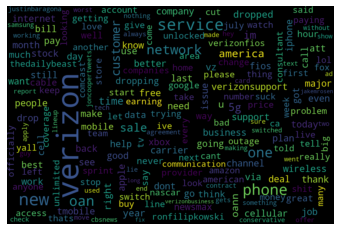

<bound method DataFrame.items of                count
keyword             
verizon         8499
phone            973
service          919
america news     819
one america      802
...              ...
carlosegates1      1
metquartet         1
lennydykstra       1
ricchdawgg1        1
administer         1

[24688 rows x 1 columns]>

att


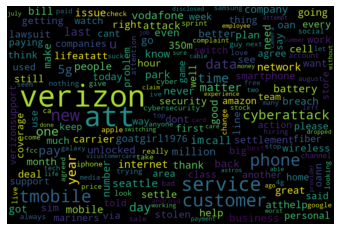

<bound method DataFrame.items of                count
keyword             
verizon          712
att              535
att verizon      275
service          205
phone            188
...              ...
maidenireland      1
straightfire       1
lasskicker         1
beckylynch         1
downs              1

[10410 rows x 1 columns]>

tmobile


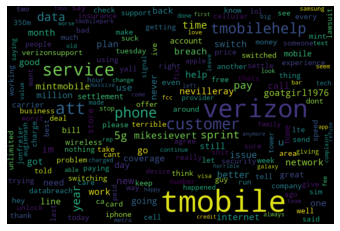

<bound method DataFrame.items of              count
keyword           
tmobile        575
verizon        364
service        240
phone          192
tmobilehelp    171
...            ...
shes             1
authorized       1
wth              1
payg             1
paris            1

[4789 rows x 1 columns]>



In [22]:
for b in brands:
    if len(brand_all_text(b)) != 0:
        
        #create a wordcloud
        print(b)
        wc = WordCloud(width=1200, height=800, max_font_size=110, collocations=False).generate(brand_all_text(b))
        plt.axis("off")
        plt.imshow(wc, interpolation="bilinear")
        plt.show()
                
        #count words in the wordcloud
        text_combined = brand_all_text(b)
        kwords = WordCloud().process_text(text_combined)
        df_kwords = pd.DataFrame(list(kwords.items()), columns=['keyword', 'count']).set_index('keyword')
        df_kwords = df_kwords.sort_values(by="count", ascending=False)
        print(df_kwords.items)
        print("=========================================\n")
        
    else:
        print(f"{b} has no tweets.")
        print("=========================================\n")

# 9. Words occuring together

In [23]:
import nltk

In [27]:

bigram_measures = nltk.collocations.BigramAssocMeasures()
bigram_finder = nltk.BigramCollocationFinder.from_documents([d.split() for d in df_tweets['text_clean']])

bigram_finder.apply_freq_filter(3)

bigram_freq = list(bigram_finder.ngram_fd.items())

In [25]:
df_freq = pd.DataFrame([(' '.join(k), v) for k,v in bigram_freq], columns=['keyphrase', 'count'])
df_freq.sort_values(by='count', ascending=False, inplace=True)
df_freq.set_index('keyphrase', inplace = True)
df_freq

,count
keyphrase,
data breach,1233
america news,1028
one america,1011
gon na,684
customer service,674
...,...
etc worked,3
worked jiofi,3
jiofi device,3


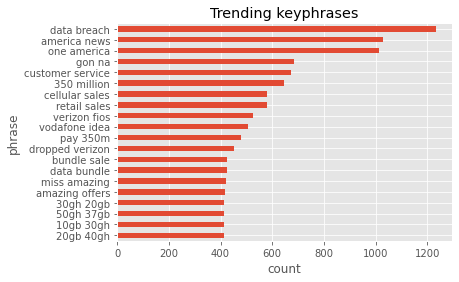

In [26]:
plt.style.use('ggplot')

df_freq.head(20).sort_values(by='count').plot(kind = 'barh')
plt.title('Trending keyphrases')
plt.ylabel('phrase')
plt.xlabel('count')
plt.legend().set_visible(False)
plt.show()